In [3]:
import numpy as np
from random import uniform

def gen_data(num_points, A, K, variance):
    x = np.zeros(shape=(num_points, 2))
    y = np.zeros(shape=num_points)
    for i in range(0, num_points):
        x[i][0] = 1
        x[i][1] = i
        y[i] = (A * i + K) + uniform(0, 1) * variance

    return x, y

(100, 2)
(100,)


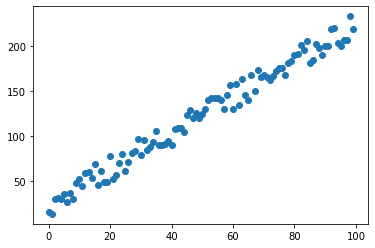

In [118]:
import matplotlib.pyplot as plt
%matplotlib inline

x, y = gen_data(100, 2, 10, 30)
print(x.shape)
print(y.shape)
plt.scatter(x[:, 1], y)

In [119]:
x.T

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
        52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
        65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77

In [120]:
alpha = 0.0001
theta = [1., 1.]
y_hat = x.dot(theta)
y_hat

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])

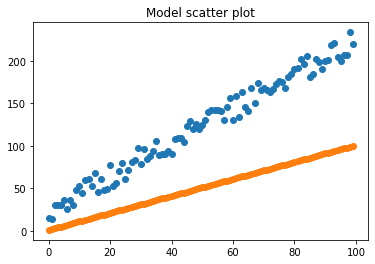

In [121]:
def show_model(x, y, y_model, caption="Model scatter plot"):
    plt.scatter(x, y)
    plt.scatter(x, y_model)
    plt.title(label=caption)
show_model(x[:, 1], y, y_hat)


In [122]:
error = y - y_hat
error

array([ 13.88811133,  11.299459  ,  26.94456594,  26.82597652,
        24.89737518,  29.67191029,  19.16980527,  28.33499153,
        21.14047816,  38.17683664,  41.21144266,  31.91068297,
        46.23065045,  46.4702312 ,  38.06581729,  52.57956172,
        29.06467804,  42.6820029 ,  29.33860589,  28.93842409,
        56.63104389,  30.49885632,  33.33998322,  45.84160049,
        54.66818903,  34.64159688,  44.63759994,  53.35606416,
        54.59176533,  66.85931896,  47.88481615,  63.73140119,
        51.91542006,  53.87946893,  59.04095694,  69.93244798,
        52.6479158 ,  52.64217175,  51.77500205,  54.16891508,
        49.42135469,  65.59742897,  66.39697473,  65.39804801,
        59.36541879,  77.04401572,  82.17243613,  72.32469138,
        76.66361031,  70.14492395,  73.5610874 ,  78.74625507,
        87.16639949,  88.11308421,  87.68384898,  86.46899523,
        83.80685187,  72.02539319,  87.06322886,  96.56934923,
        69.36218504,  96.24238094,  71.26636201,  99.29

In [123]:
mse = np.mean(np.dot(error, error))
mse

622767.8407107079

In [124]:
gradient = [0., 0.]
gradient[0] = -np.sum(error) * 2 / len(error)
gradient[1] = -np.sum(np.dot(x[:, 1], error)) * 2 / len(error)
gradient

[-145.52609985560434, -8893.22597983858]

gradient 2 factor could be absorbed into learning rate

In [125]:
gradient_shortcut = -2 * np.dot(x.T, error) / len(error)
gradient_shortcut

array([ -145.52609986, -8893.22597984])

In [127]:

guesses = []
for i in range(0, 10):
    guesses.append(theta.copy())
    theta -= alpha * gradient_shortcut
    error = y - x.dot(theta)
    gradient_shortcut = 2 * np.dot(x.T, error) / len(error)
guesses

[array([1.03185419, 2.35374502]),
 array([1.03299835, 2.35374791]),
 array([1.03185444, 2.35375824]),
 array([1.03071041, 2.35376404]),
 array([1.02956621, 2.35376232]),
 array([1.02842176, 2.35374815]),
 array([1.02727694, 2.35371333]),
 array([1.02613155, 2.35364432]),
 array([1.02498524, 2.35351864]),
 array([1.02383746, 2.35329909])]

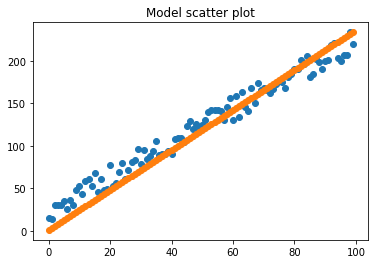

In [128]:
show_model(x[:, 1], y, x.dot(theta))

In [148]:
theta

array([-1.24884675e+07, -8.28337724e+08])

In [150]:
def gradient_descent(x, y, theta, alpha, num_iter):
    assert(len(x) == len(y))
    assert(len(x[0] >= 2))
    for i in range(0, num_iter):
        print(theta)
        error = y - x.dot(theta)
        print(np.sum(error))
        gradient = -2 * np.dot(x.T, error) / len(error)
        theta -= alpha * gradient
    return theta

In [152]:
x, y = gen_data(100, 2, 10, 30)
theta = np.ones(len(x[1]))
theta = gradient_descent(x, y, theta, 0.0001, 10)
theta

[1. 1.]
7413.758435377421
[1.01482752 1.9113452 ]
2901.116964270747
[1.02062975 2.22406321]
1352.5825749653957
[1.02333492 2.33136186]
821.1837317663117
[1.02497728 2.36817071]
638.8157070874803
[1.02625491 2.38079092]
576.217867766395
[1.02740735 2.3851108 ]
554.7192573678135
[1.02851679 2.3865824 ]
547.3238787985287
[1.02961144 2.38707662]
544.7680356185575
[1.03070097 2.38723545]
543.8728835186298


array([1.03178872, 2.38727918])

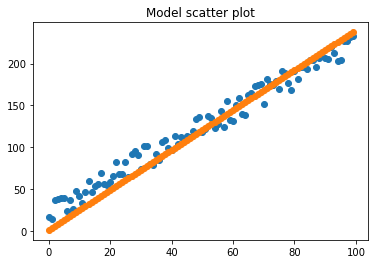

In [153]:
show_model(x[:, 1], y, x.dot(theta))

In [158]:
def gen_data_m(num_points, num_dim, thetas, variance):
    x = np.random.rand(num_points, num_dim)
    y = np.zeros(shape=num_points)
    for i in range(0, num_points):
        x[i][0] = 1
        y[i] = 0
        for j in range(0, len(thetas)):
            y[i] += x[i, j] * thetas[j]
        y[i] += uniform(0, 1) * variance
    return x, y

In [160]:
x, y = gen_data_m(100, 3, [1, 5, 3], 5)
x
y

array([ 6.37277155,  8.6340331 ,  7.05307716,  5.08112183,  4.89540953,
        3.43442841, 12.69029325,  7.26834148,  7.87777498,  9.9966331 ,
        9.91314695,  6.32323736,  8.75720129,  5.07334166, 10.83801828,
        4.53053931, 12.39124249,  8.70925406, 10.39756998,  9.96625772,
        9.7960893 ,  8.60601573,  9.50065629,  9.06624186,  6.02368843,
        6.51398036,  5.91970823,  5.59099101,  9.43404994, 11.72408629,
        6.69802867,  8.63531587,  9.21187665,  9.51380916,  5.52738958,
        4.67875814,  5.77096095,  8.8456526 ,  8.07208894,  8.35962992,
        4.51778577,  8.75660685,  4.9051215 ,  4.79785159, 10.1045606 ,
       11.18991641, 11.17948516,  8.72062197, 11.30351784,  3.34636514,
        5.58401456, 10.13023333,  7.01008662,  4.47040716,  9.78233452,
        8.08199697,  8.26852467,  6.22954329,  3.03030959, 12.17997861,
        9.35252187,  6.99794035, 10.66405907,  5.23149262,  9.78905968,
       10.53437839,  7.02234824,  9.31542859,  8.04183665,  5.71

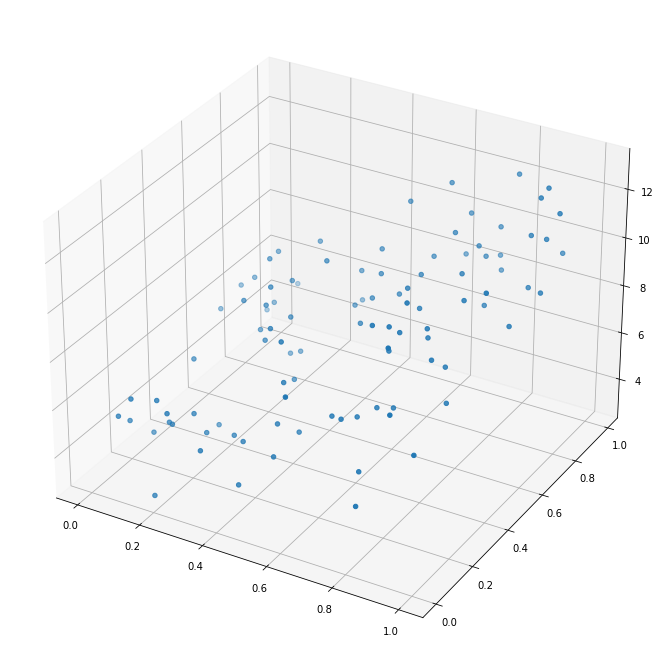

In [162]:
%matplotlib inline
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:, 1], x[:, 2], y)

In [167]:
thetas = gradient_descent(x, y, [1, 1, 1], 0.001, 1000)
thetas

[1, 1, 1]
577.685964674488
[1.01155372 1.00678146 1.00624269]
575.863537896655
[1.02307099 1.01354242 1.01246602]
574.0467973067507
[1.03455193 1.02028292 1.01867005]
572.235725171091
[1.04599664 1.02700303 1.02485485]
570.4303038112979
[1.05740525 1.03370282 1.03102047]
568.6305156041261
[1.06877786 1.04038235 1.03716698]
566.8363429812914
[1.08011458 1.04704169 1.04329443]
565.0477684292996
[1.09141554 1.05368089 1.04940288]
563.2647744892752
[1.10268083 1.06030002 1.05549239]
561.4873437567911
[1.11391058 1.06689914 1.06156303]
559.7154588816992
[1.12510489 1.07347831 1.06761484]
557.9491025679607
[1.13626387 1.0800376  1.07364789]
556.1882575734777
[1.14738764 1.08657707 1.07966224]
554.4329067099242
[1.1584763  1.09309678 1.08565795]
552.6830328425793
[1.16952996 1.09959679 1.09163506]
550.9386188901606
[1.18054873 1.10607716 1.09759365]
549.199647824655
[1.19153272 1.11253795 1.10353377]
547.4661026711553
[1.20248204 1.11897923 1.10945548]
545.7379665076935
[1.2133968  1.12540106

array([4.45364676, 3.21294935, 2.93750704])

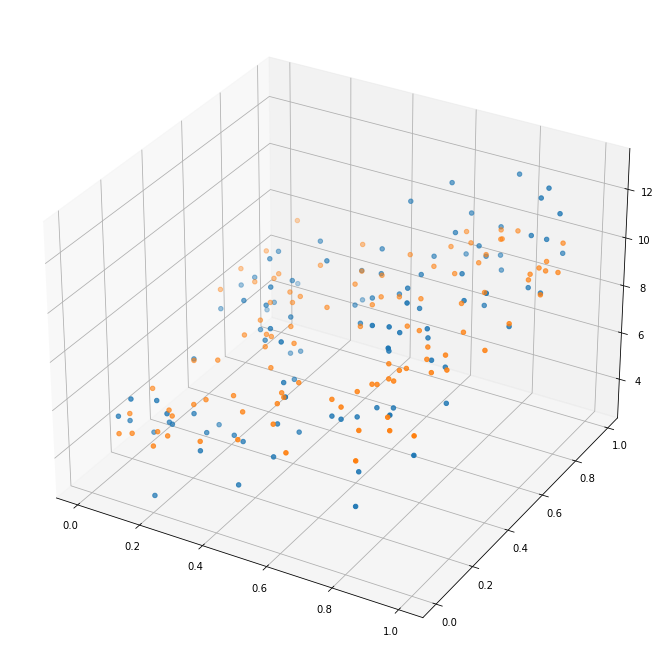

In [168]:
%matplotlib inline
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:, 1], x[:, 2], y)
y_hat = x.dot(thetas)
ax.scatter(x[:, 1], x[:, 2], y_hat)